In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
# Load the raw CIFAR-10 data.
cifar10_dir = '../data/cifar10'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print 'Training data shape: ', X_train.shape
print 'Training labels shape: ', y_train.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Training data shape:  (50000L, 32L, 32L, 3L)
Training labels shape:  (50000L,)
Test data shape:  (10000L, 32L, 32L, 3L)
Test labels shape:  (10000L,)


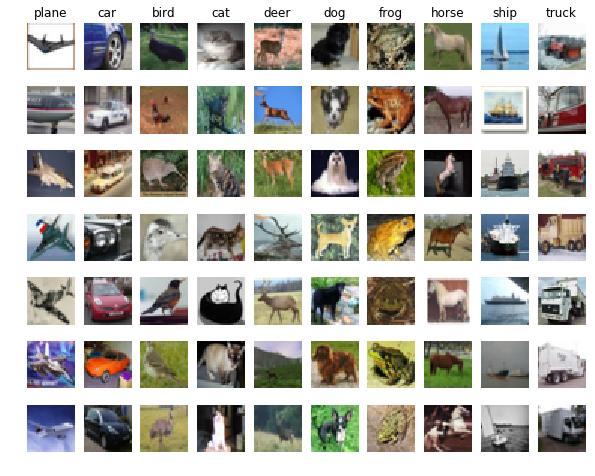

In [17]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)  # 压平并去掉0元素
    idxs = np.random.choice(idxs, samples_per_class, replace=False)  # 随机选7个index
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [23]:
# Subsample the data for more efficient code execution in this exercise
# 原数据shape(5000L, 32L, 32L, 3L)
num_training = 5000
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

X_train = X_train.reshape(num_training, -1)
X_test = X_test.reshape(num_test, -1)
print X_train.shape, X_test.shape

(5000L, 3072L) (500L, 3072L)


In [25]:
from cs231n.classifiers import KNearestNeighbor

# Create a kNN classifier instance. 
# Remember that training a kNN classifier is a noop: 
# the Classifier simply remembers the data and does no further processing 
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

In [29]:
# Open cs231n/classifiers/k_nearest_neighbor.py and implement
# compute_distances_two_loops.

# Test your implementation:
dists = classifier.compute_distances_no_loops(X_test)

(500L, 5000L)


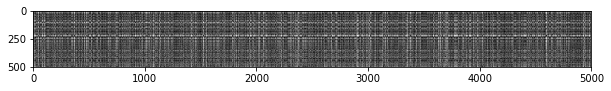

In [37]:
print dists.shape
# plt.imshow(dists, interpolation='none', cmap=plt.cm.ocean)
plt.imshow(dists, interpolation='none',)

In [38]:
y_test_pred = classifier.predict_labels(dists, k=1)
num_correct = np.sum([y_test_pred == y_test])
accuracy = num_correct / float(num_test)
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)

Got 137 / 500 correct => accuracy: 0.274000


In [39]:
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum([y_test_pred == y_test])
accuracy = num_correct / float(num_test)
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)

Got 139 / 500 correct => accuracy: 0.278000


In [40]:
y_test_pred = classifier.predict_labels(dists, k=10)
num_correct = np.sum([y_test_pred == y_test])
accuracy = num_correct / float(num_test)
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)

Got 141 / 500 correct => accuracy: 0.282000


In [41]:
dists_one = classifier.compute_distances_one_loop(X_test)

difference = np.linalg.norm(dists - dists_one, ord='fro')
print 'Difference was: %f' % (difference, )
if difference < 0.001:
      print 'Good! The distance matrices are the same'
else:
      print 'Uh-oh! The distance matrices are different'

Difference was: 0.000000
Good! The distance matrices are the same


In [42]:
dists_two = classifier.compute_distances_two_loops(X_test)
difference = np.linalg.norm(dists - dists_two, ord='fro')
print 'Difference was: %f' % (difference, )
if difference < 0.001:
      print 'Good! The distance matrices are the same'
else:
      print 'Uh-oh! The distance matrices are different'

Difference was: 0.000000
Good! The distance matrices are the same


In [44]:
dists_no = classifier.compute_distances_no_loops(X_test)

difference = np.linalg.norm(dists - dists_no, ord='fro')
print 'Difference was: %f' % (difference, )
if difference < 0.001:
      print 'Good! The distance matrices are the same'
else:
      print 'Uh-oh! The distance matrices are different'

Difference was: 0.000000
Good! The distance matrices are the same


In [46]:
import time
def time_function(f, *args):
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

two_loop_time = time_function(classifier.compute_distances_two_loops, X_test)
print 'Two loop version took %f seconds' % two_loop_time

one_loop_time = time_function(classifier.compute_distances_one_loop, X_test)
print 'One loop version took %f seconds' % one_loop_time

no_loop_time = time_function(classifier.compute_distances_no_loops, X_test)
print 'No loop version took %f seconds' % no_loop_time

Two loop version took 33.298000 seconds
One loop version took 71.240000 seconds
No loop version took 0.227000 seconds


In [52]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []

y_train_ = y_train.reshape(-1, 1)

X_train_folds, y_train_folds = np.array_split(X_train, 5), np.array_split(y_train_, 5)

In [62]:
k_to_accuracies = {}
for k_ in k_choices:
    k_to_accuracies.setdefault(k_, [])
for i in range(num_folds):
    classifier = KNearestNeighbor()
    X_val_train = np.vstack(X_train_folds[0:i] + X_train_folds[i + 1:])  # 切掉某一份fold
    y_val_train = np.vstack(y_train_folds[0:i] + y_train_folds[i + 1:])
    y_val_train = y_val_train[:, 0]  # 将二维变为一维
    classifier.train(X_val_train, y_val_train)
    for k_ in k_choices:
        y_val_pred = classifier.predict(X_train_folds[i], k=k_)
        num_correct = np.sum(y_val_pred == y_train_folds[i][:, 0])
        accuracy = float(num_correct) / len(y_val_pred)
        k_to_accuracies[k_] = k_to_accuracies[k_] + [accuracy]

In [63]:
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print 'k = %d, accuracy = %f' % (k, accuracy)

k = 1, accuracy = 0.263000
k = 1, accuracy = 0.257000
k = 1, accuracy = 0.264000
k = 1, accuracy = 0.278000
k = 1, accuracy = 0.266000
k = 3, accuracy = 0.239000
k = 3, accuracy = 0.249000
k = 3, accuracy = 0.240000
k = 3, accuracy = 0.266000
k = 3, accuracy = 0.254000
k = 5, accuracy = 0.248000
k = 5, accuracy = 0.266000
k = 5, accuracy = 0.280000
k = 5, accuracy = 0.292000
k = 5, accuracy = 0.280000
k = 8, accuracy = 0.262000
k = 8, accuracy = 0.282000
k = 8, accuracy = 0.273000
k = 8, accuracy = 0.290000
k = 8, accuracy = 0.273000
k = 10, accuracy = 0.265000
k = 10, accuracy = 0.296000
k = 10, accuracy = 0.276000
k = 10, accuracy = 0.284000
k = 10, accuracy = 0.280000
k = 12, accuracy = 0.260000
k = 12, accuracy = 0.295000
k = 12, accuracy = 0.279000
k = 12, accuracy = 0.283000
k = 12, accuracy = 0.280000
k = 15, accuracy = 0.252000
k = 15, accuracy = 0.289000
k = 15, accuracy = 0.278000
k = 15, accuracy = 0.282000
k = 15, accuracy = 0.274000
k = 20, accuracy = 0.270000
k = 20, accu

{1: [0.263, 0.257, 0.264, 0.278, 0.266], 3: [0.239, 0.249, 0.24, 0.266, 0.254], 100: [0.256, 0.27, 0.263, 0.256, 0.263], 5: [0.248, 0.266, 0.28, 0.292, 0.28], 8: [0.262, 0.282, 0.273, 0.29, 0.273], 10: [0.265, 0.296, 0.276, 0.284, 0.28], 12: [0.26, 0.295, 0.279, 0.283, 0.28], 15: [0.252, 0.289, 0.278, 0.282, 0.274], 50: [0.271, 0.288, 0.278, 0.269, 0.266], 20: [0.27, 0.279, 0.279, 0.282, 0.285]}


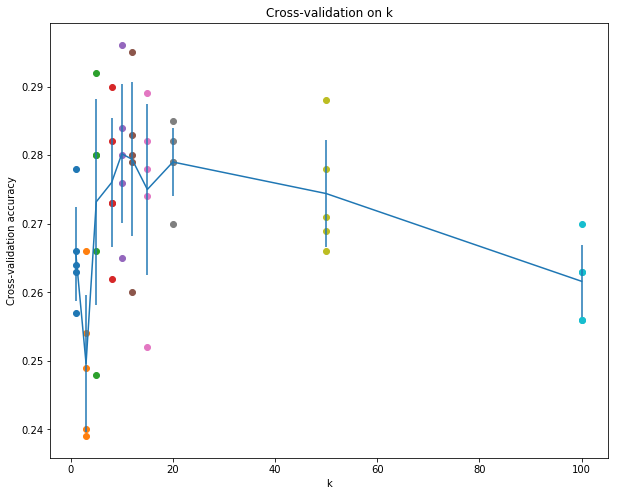

In [86]:
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)
print k_to_accuracies
accuracies_mean = np.array([np.mean(v) for k, v in sorted(k_to_accuracies.iteritems())])
accuracies_std = np.array([np.std(v) for k, v in sorted(k_to_accuracies.iteritems())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
# # plot the trend line with error bars that correspond to standard deviation
# accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
# accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
# plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
# plt.title('Cross-validation on k')
# plt.xlabel('k')
# plt.ylabel('Cross-validation accuracy')
plt.show()

In [87]:
# Based on the cross-validation results above, choose the best value for k,   
# retrain the classifier using all the training data, and test it on the test
# data. You should be able to get above 28% accuracy on the test data.
best_k = 10

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)

Got 141 / 500 correct => accuracy: 0.282000
